In [98]:
import numpy as np
import matplotlib.pyplot as plt
import os, json

%matplotlib inline

In [99]:
import pyusct
from pyusct.preprocess import load_usctsim_result, draw_input

In [100]:
from scipy import signal

In [101]:
def norm_mat(mat):
    r = mat.max() - mat.min()
    if r == 0 : pass
    return (mat - np.min(mat)) / r

In [107]:
import scipy.ndimage

In [229]:
import json

## parameters

In [253]:
result_path = "/mnt/nas/2018-01-13_1/trial_001/"

In [265]:
out_dir = "/mnt/nas/PYUSCT_train/dataset002/"
if not os.path.exists(out_dir): 
    os.makedirs(os.path.join(out_dir, "input"))
    os.makedirs(os.path.join(out_dir, "output"))    

In [255]:
offset_min = -100
offset_max = 100
offset_int = 1

In [256]:
radius = 2

In [257]:
## load simulation I/O data
param, arr_cart_pos, mask_points, map_speed, map_dens, rfdata = load_usctsim_result(result_path)

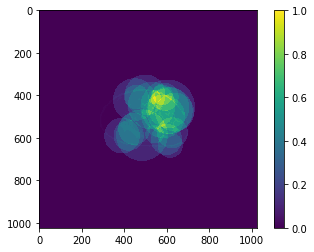

In [258]:
map_impedance = np.array(map_dens, dtype=np.float64) * np.array(map_speed, dtype=np.float64)
map_impedance = norm_mat(map_impedance)
plt.imshow(map_impedance)
plt.colorbar()

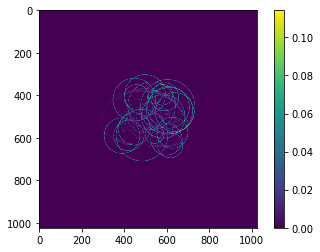

In [259]:
map_grad = abs(scipy.ndimage.filters.gaussian_gradient_magnitude(map_impedance, sigma=1))
plt.imshow(map_grad)
plt.colorbar()

In [267]:
p = {}
p["offset"] = {"min": offset_min, "max":offset_max, "interval":offset_int}
p["outrad"] = radius
with open(os.path.join(out_dir,"param.json"), 'w') as outf:
    json.dump(p, outf, indent=4)

In [268]:
with open(os.path.join(out_dir, "list.csv"), 'w') as outf:
    outf.write('source,id,ix,iy,x,y\n')
    
    for i in range(10000):

        ix = np.random.randint(256, param["grid"]["Nx"]-256)
        iy = np.random.randint(256, param["grid"]["Ny"]-256)

        x = (ix - param["grid"]["Nx"]/2) * param["grid"]["dx"]
        y = (iy - param["grid"]["Ny"]/2) * param["grid"]["dy"]

        out_image = map_grad[iy-radius:iy+radius+1, ix-radius:ix+radius+1]

        _, submat = rfdata.getPointSubset([y, x], np.arange(offset_min,offset_max, offset_int))
        
        outf.write('{0},{1},{2},{3},{4},{5}\n'.format(result_path, i,ix,iy,x,y))
        
        np.save(os.path.join(os.path.join(out_dir,"input"), '{0:0>6}'.format(i)), submat)
        np.save(os.path.join(os.path.join(out_dir,"output"),'{0:0>6}'.format(i)), out_image)